<a href="https://colab.research.google.com/github/shalujha/Advance_House_Prediction/blob/main/Advance_house_price_predction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/b7o905hpzc9d5ct/house-prices-advanced-regression-techniques.zip?dl=0

--2021-01-24 10:14:26--  https://www.dropbox.com/s/b7o905hpzc9d5ct/house-prices-advanced-regression-techniques.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/b7o905hpzc9d5ct/house-prices-advanced-regression-techniques.zip [following]
--2021-01-24 10:14:26--  https://www.dropbox.com/s/raw/b7o905hpzc9d5ct/house-prices-advanced-regression-techniques.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce70827edb831cd3f1f32d4ecbc.dl.dropboxusercontent.com/cd/0/inline/BHkLwCBTKPwf6iw9iISZ2PgvMlC9pHGz7-GFyP1oT2VkRkTKuq4XiDl2ee3gNyoRbzcHY0T55kJZXkkg_UVCuzHSaJQA8r4ur89ClbXkvUy2aDMRqO15jDc7MLXHQE-aggM/file# [following]
--2021-01-24 10:14:27--  https://uce70827edb831cd3f1f32d4ecbc.dl.dropboxusercontent.com/cd/0/inline/B

In [2]:
!unzip 'house-prices-advanced-regression-techniques.zip?dl=0' -d "data/"

Archive:  house-prices-advanced-regression-techniques.zip?dl=0
  inflating: data/data_description.txt  
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [3]:
# importing libraries:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# lets explore data :
train_df=pd.read_csv('/content/data/train.csv')
print(train_df.head())

   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0   1          60       RL  ...        WD         Normal    208500
1   2          20       RL  ...        WD         Normal    181500
2   3          60       RL  ...        WD         Normal    223500
3   4          70       RL  ...        WD        Abnorml    140000
4   5          60       RL  ...        WD         Normal    250000

[5 rows x 81 columns]


In [5]:
print(train_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
print(train_df.info())
print(train_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
 # as we can see, there are many missing values in dataset, we have to handle that first:
 print(train_df['Alley'].head(n=30))
 print(train_df['Alley'].unique())

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21    Grvl
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
Name: Alley, dtype: object
[nan 'Grvl' 'Pave']


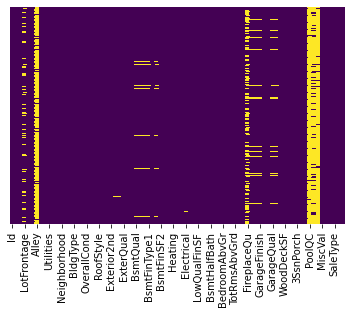

In [8]:
# lets see by visualising it:
sns.heatmap(train_df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [9]:
# dropping columns that have extremely less null values
train_df=train_df.drop(columns=['Alley','PoolQC','MiscFeature'])

In [10]:
# lets handle  missing data:
# we have already dropped columns that have extremely large null values
# we will handle categorcal features by replacing nan with the most frequent values of that particular feature.
#train_df.info()
def handle_categorical(train_df,col):
  print(col)
  max_freq_data=train_df[col].value_counts().nlargest(n=1).index[0]
  train_df[col]=train_df[col].fillna(max_freq_data)
  return train_df
categorical_features=['LotFrontage','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure',
'BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu','GarageType','GarageYrBlt','GarageFinish',
'GarageQual','GarageCond','Fence']
for col in categorical_features:
  train_df=handle_categorical(train_df,col)

LotFrontage
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
Fence


In [11]:
# All missing values have been handled now :)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

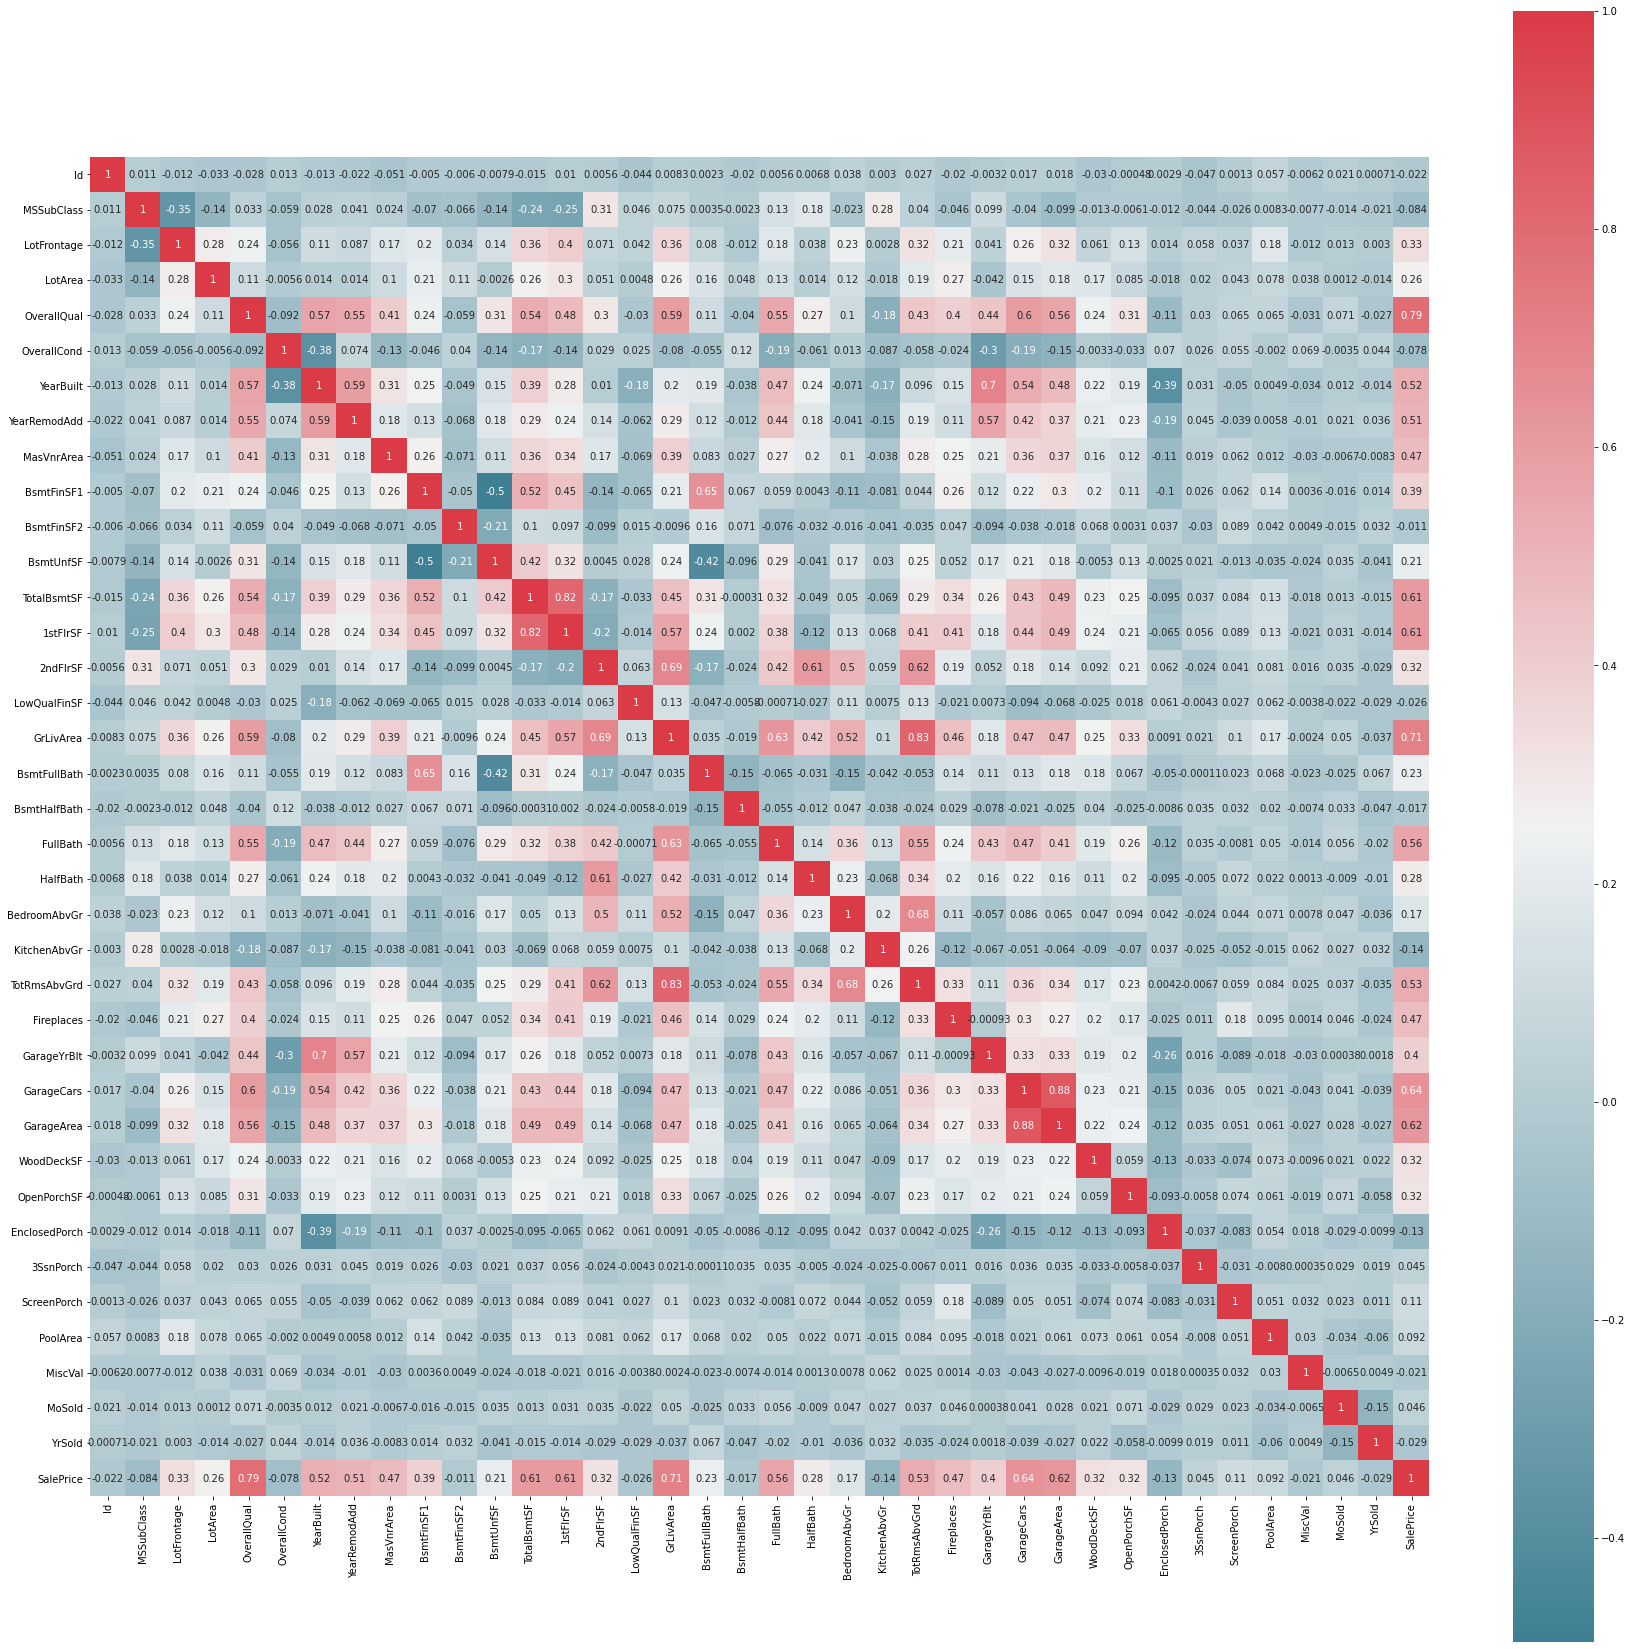

In [12]:
f, ax = plt.subplots(figsize=(30, 30))
corr =train_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

In [16]:
#train_df=train_df.values
from sklearn.preprocessing import LabelEncoder
train_df.head()
def Perform_labelEncoding(train_df,col):
  le=LabelEncoder()
  train_df[col]=le.fit_transform(train_df[col])
  return train_df
categorical_features=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
                      'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',
                      'Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
                      'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
                      'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
                      'GarageFinish','GarageQual','GarageCond','PavedDrive','Fence','SaleType','SaleCondition']
for col in categorical_features:
  train_df[col]=Perform_labelEncoding(train_df,col)

In [117]:
# splitting data into X and Y
X=train_df.iloc[:,:-1]
Y=train_df.iloc[:,-1]
print(X.shape,Y.shape)
#X=train_df[:,:-1]
#Y=train_df[:,-1]
#print(X.shape,Y.shape)

(1460, 77) (1460,)


In [27]:
# there would be categorical features in the form of String, before further computation, they have to be get
# converted into numbers:
#X=le.fit_transform(X)

In [118]:
# lets do some feature selection:
from sklearn.feature_selection import chi2,SelectKBest

In [122]:
best_features=SelectKBest(score_func=chi2,k=77)
#print(type(best_features))
fit = best_features.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(20,'Score')) 
#featureScores=featureScores.sort_values(by='Score',ascending=False)
#print(featureScores)
featureScores=featureScores.sort_values(by='Score',ascending=False)
print(featureScores)

           Specs         Score
4        LotArea  1.011497e+07
72       MiscVal  6.253332e+06
43      2ndFlrSF  4.648841e+05
33    BsmtFinSF1  3.999851e+05
70      PoolArea  3.835642e+05
..           ...           ...
19  YearRemodAdd  1.888822e+02
50  BedroomAbvGr  1.715867e+02
17   OverallCond  1.549787e+02
51  KitchenAbvGr  2.849083e+01
74        YrSold  6.029712e-01

[77 rows x 2 columns]


In [123]:
print(X.shape[1])

77


In [124]:
def findBestK(X):
  acc_list=[]
  for i in range(1,X.shape[1]+1):
    selected_features=featureScores.nlargest(i,'Score')
    input_features=[]
    for j in range(selected_features['Specs'].shape[0]):
      input_features.append(selected_features['Specs'].iloc[j])
    modified_X=X[input_features]
    X_train, X_test, y_train, y_test = train_test_split(modified_X, Y, test_size=0.2)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    acc_list.append(lr.score(X_test,y_test))
  return acc_list

In [125]:
acc_list=findBestK(X)

0.8383660099330905
76


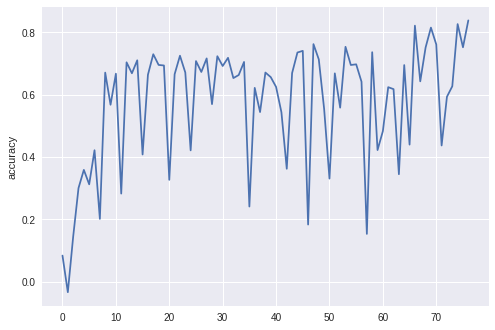

In [130]:
plt.style.use('seaborn')
plt.plot(acc_list)
plt.ylabel('accuracy')
max_acc_index=np.argmax(acc_list)
print(acc_list[max_acc_index])
print(max_acc_index)
# so if we reject only one feature, we achieved highest accuracy through this method.
# 83% is pretty much good accuracy!

In [104]:
'''
input_features=[]
for i in range(selected_features['Specs'].shape[0]):
  input_features.append(selected_features['Specs'].iloc[i])
#print(input_features)
#print(selected_features.index[1])
#input_features=selected_features['Specs']
#print(input_features.index[2])
'''

['LotArea', 'MiscVal', '2ndFlrSF', 'BsmtFinSF1', 'PoolArea', 'BsmtFinSF2', 'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'TotalBsmtSF', '3SsnPorch', 'Street', 'LotShape', 'LandContour', 'Utilities', 'Foundation', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'ExterQual', 'BldgType', 'SaleCondition', 'RoofStyle', 'ExterCond', 'HouseStyle', 'MasVnrType', 'Exterior2nd', 'Exterior1st', 'RoofMatl', 'MSZoning', 'LotConfig', 'BsmtQual', 'Heating', 'BsmtFinType2', 'BsmtFinType1', 'HeatingQC', 'CentralAir', 'Electrical', 'Id', 'KitchenQual', 'BsmtCond', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'BsmtExposure', 'ScreenPorch', 'WoodDeckSF', '1stFlrSF', 'EnclosedPorch', 'GarageArea', 'OpenPorchSF', 'MSSubClass', 'LotFrontage', 'MoSold', 'BsmtHalfBath', 'Fireplaces', 'HalfBath', 'BsmtFullBath', 'YearBuilt', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars', 'GarageYrBlt', 'FullBath']


In [105]:
#print(selected_features['Specs'].shape)
#print(selected_features['Specs'].iloc[0])

In [106]:
'''
modified_X=X[input_features]
print(modified_X.shape)
'''

(1460, 72)


In [107]:
'''
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(modified_X, Y, test_size=0.2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)
'''

(1168, 72) (1168,) (292, 72) (292,)


In [108]:
'''
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
'''

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
'''
lr.score(X_test,y_test)
'''

0.8335508960016782